In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
CUTOFF = 400000

In [24]:
def get_xs_and_ys(name: str):
    df = pd.read_csv(f"L_1_30/{name}.csv")
    xs = list(df[df["jolt"] < CUTOFF]["time"])
    ys = df[df["jolt"] < CUTOFF]["jolt"]
    ys = list(np.sqrt(ys))

    final_xs = []
    final_ys = []
    for ix, x in enumerate(list(xs)):
        if ys[ix] > 25:
            final_xs.append(xs[ix-1])
            final_ys.append(0)
            final_xs.append(x-0.1)
            final_ys.append(0)
        final_xs.append(x)
        final_ys.append(ys[ix])

    return final_xs, final_ys

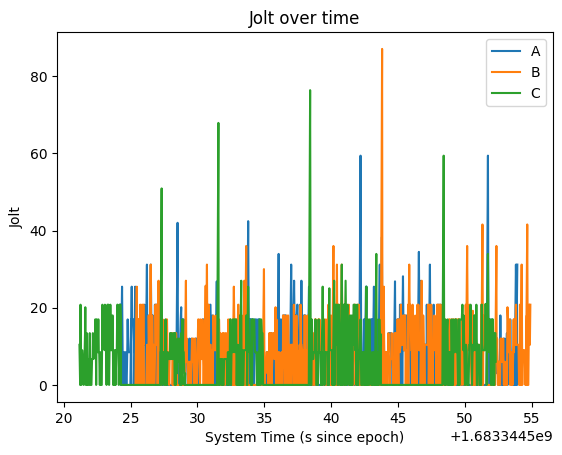

In [26]:
for name in ["A", "B", "C"]:
    xs, ys = get_xs_and_ys(name)
    xs = xs[500:10000]
    ys = ys[500:10000]
    plt.plot(xs, ys, label=name)

plt.legend()
plt.xlabel("System Time (s since epoch)")
plt.ylabel("Jolt")
plt.title("Jolt over time")
plt.show()

In [21]:
def get_average_jolt(dir: str):
    sum = 0
    count = 0
    for name in ["A", "B", "C"]:
        df = pd.read_csv(f"{dir}/{name}.csv")
        sum += df[(df["jolt"] > 0) & (df["jolt"] < CUTOFF)].sum()["jolt"]
        count += df[(df["jolt"] > 0) & (df["jolt"] < CUTOFF)].count()["jolt"]
    return np.sqrt(sum / count)

In [22]:
print(get_average_jolt("L_1_10"))
print(get_average_jolt("L_1_14"))
print(get_average_jolt("L_1_20"))
print(get_average_jolt("L_1_30"))
print(get_average_jolt("L_1_50"))
print(get_average_jolt("L_1_60"))

41.750000587501845
30.399818811924014
20.214081035819277
15.262013808871915
14.046315860808198
13.112065395255609


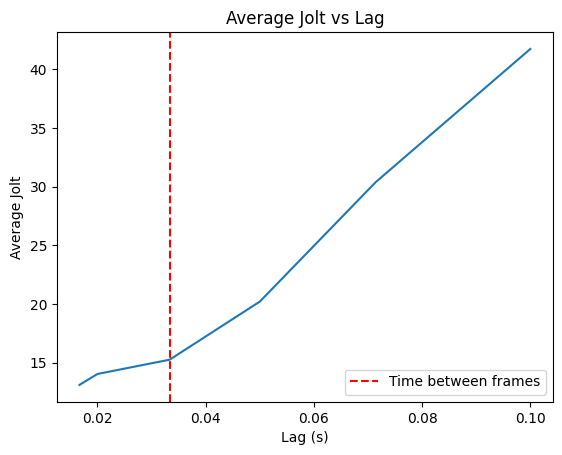

In [23]:
xs = [1.0 / x for x in [10, 14, 20, 30, 50, 60]]
ys = [get_average_jolt(f"L_1_{x}") for x in [10, 14, 20, 30, 50, 60]]
plt.plot(xs, ys)
plt.xlabel("Lag (s)")
plt.ylabel("Average Jolt")
plt.title("Average Jolt vs Lag")
# Vertical line at 1/30
plt.axvline(x=1.0 / 30.0, color="red", linestyle="dashed", label="Time between frames")
plt.legend()
plt.show()